In [0]:
!pip install landsatxplore
!pip install gdal
!pip install rasterio



---



**IMPORT LIBRARIES**

In [0]:
import rasterio
from rasterio.plot import show
import gdal
from gdalconst import GA_ReadOnly 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import subprocess
IMG=2200



---



**DOWNLOAD REFERENCE DATA SET**

In [0]:
!wget https://land.copernicus.eu/land-files/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip
!unzip /content/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip
!unzip /content/clc2018_clc2018_v2018_20_raster100m.zip

**TRANSFORM REFERENCE DATA**

In [0]:
!gdalwarp -co "COMPRESS=DEFLATE" -t_srs EPSG:32618  '/content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif' europe-clc.tif

Creating output file that is 54709P x 82959L.
Processing input file /content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif.
Using internal nodata values (e.g. -32768) for image /content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif.
Copying nodata values from source /content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif to destination europe-clc.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.




---



**DOWNLOAD TEMPORAL SCENES OF WEST EUROPE**

In [0]:
from landsatxplore.earthexplorer import EarthExplorer
ee = EarthExplorer('username', 'password')
ee.download(scene_id='LC08_L1TP_201024_20180901_20180912_01_T1', output_dir='./data/scene1')
ee.download(scene_id='LC08_L1TP_201024_20180629_20180716_01_T1', output_dir='./data/scene2')
ee.download(scene_id='LC08_L1TP_201024_20170610_20170627_01_T1', output_dir='./data/scene3')
ee.logout()





---



**PREPROCESS SCENES**

In [0]:
!tar xvzf '/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1.tar.gz' -C './data/scene1'
!tar xvzf '/content/data/scene2/LC08_L1TP_201024_20180629_20180716_01_T1.tar.gz' -C './data/scene2'
!tar xvzf '/content/data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1.tar.gz' -C './data/scene3'

In [0]:
!gdalwarp -co "COMPRESS=DEFLATE" -t_srs EPSG:32631  /content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif europe.tif

In [0]:
!gdalinfo europe.tif

In [0]:
data=gdal.Open('/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1_B1.TIF',GA_ReadOnly) 
geoTransform=data.GetGeoTransform() 
minx=geoTransform[0] 
maxy=geoTransform[3] 
maxx = minx + geoTransform[1] * data.RasterXSize 
miny = maxy + geoTransform[5] * data.RasterYSize 
subprocess.call('gdal_translate -projwin ' + ' '.join([str(x) for x in [minx, maxy, maxx, miny]]) + ' -of GTiff europe.tif img_out.tif', shell=True) 

In [0]:
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/img_out.tif' 'Y.tif'

Input file size is 2262, 2287
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.


SCENE 1 PREPROCESSING

In [0]:
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1_B2.TIF' 's1b2.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1_B3.TIF' 's1b3.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1_B4.TIF' 's1b4.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1_B5.TIF' 's1b5.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1_B6.TIF' 's1b6.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1_B7.TIF' 's1b7.tif'

SCENE 2 PREPROCESSING

In [0]:
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene2/LC08_L1TP_201024_20180629_20180716_01_T1_B2.TIF' 's2b2.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene2/LC08_L1TP_201024_20180629_20180716_01_T1_B3.TIF' 's2b3.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene2/LC08_L1TP_201024_20180629_20180716_01_T1_B4.TIF' 's2b4.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene2/LC08_L1TP_201024_20180629_20180716_01_T1_B5.TIF' 's2b5.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene2/LC08_L1TP_201024_20180629_20180716_01_T1_B6.TIF' 's2b6.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene2/LC08_L1TP_201024_20180629_20180716_01_T1_B7.TIF' 's2b7.tif'

SCENE 3 PREPROCESSING

In [0]:
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1_B2.TIF' 's3b2.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1_B3.TIF' 's3b3.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1_B4.TIF' 's3b4.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1_B5.TIF' 's3b5.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1_B6.TIF' 's3b6.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1_B7.TIF' 's3b7.tif'

Input file size is 8091, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8091, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8091, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8091, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8091, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warni



---



**HELPER** **FUNCTIONS**

In [0]:
#CALCULATE SPECTRAL INDICES LIKE NDVI, NDBI etc..
def calculate_spectral_index(band1,band2):
  ndbi=np.where((band1+band2)==0.,0,(band1-band2)/(band1+band2))
  return ndbi

def read_band_data(fileName):
        a=gdal.Open(fileName)
        a1=a.GetRasterBand(1).ReadAsArray().astype(dtype='float')
        return a1


In [0]:
#CALCULATE SPECTRAL INDICES FOR A SINGLE SCENE
def calculate_all_indices_for_a_scene(root_name):
        temp_list=[]
        b2=read_band_data((root_name+'b'+str(2)+'.tif'))
        b3=read_band_data((root_name+'b'+str(3)+'.tif'))
        b4=read_band_data((root_name+'b'+str(4)+'.tif'))
        b5=read_band_data((root_name+'b'+str(5)+'.tif'))
        b6=read_band_data((root_name+'b'+str(6)+'.tif'))
        b7=read_band_data((root_name+'b'+str(7)+'.tif'))

        temp_list.append(calculate_spectral_index(b6,b5))
        temp_list.append(calculate_spectral_index(b3,b5))
        temp_list.append(calculate_spectral_index(b5,b4))
        temp_list.append(calculate_spectral_index(b6,b7))
        temp_list.append(calculate_spectral_index(b4,b2))
        temp_list.append(calculate_spectral_index(b3,b2))

        return temp_list

In [0]:
scene1_indices=calculate_all_indices_for_a_scene('s1')
scene2_indices=calculate_all_indices_for_a_scene('s2')
scene3_indices=calculate_all_indices_for_a_scene('s3')

In [0]:
#CALCULATE TEMPORAL STATISTICS LIKE MEAN, MIN, MAX etc..
def calc_temporal_statistics(scene1,scene2,scene3):
  temp_min = np.zeros(shape=(IMG,IMG))
  temp_max = np.zeros(shape=(IMG,IMG))
  temp_mean = np.zeros(shape=(IMG,IMG))
  temp_std = np.zeros(shape=(IMG,IMG))
  temp_mean_slope = np.zeros(shape=(IMG,IMG))

  for i in tqdm(range(0,IMG)):
    for j in range(0,IMG):
      x=scene1[i][j]
      y=scene2[i][j]
      z=scene3[i][j]

      temp_min[i][j]=np.amin([x,y,z])
      temp_max[i][j]=np.amax([x,y,z])
      temp_mean[i][j]=np.mean([x,y,z])
      temp_std[i][j]=np.std([x,y,z])  
      temp_mean_slope[i][j]=np.average(np.diff([x,y,z]))
      
  return (temp_min,temp_max,temp_mean,temp_std,temp_mean_slope)




---



**COMPUTE FEATURES BASED ON TEMPORAL CHARACTERSITCS OF DIFFERENT SCENES**

In [7]:
ndbi_statistics=calc_temporal_statistics(scene1_indices[0],scene2_indices[0],scene3_indices[0])

In [8]:
mndwi_statistics=calc_temporal_statistics(scene1_indices[1],scene2_indices[1],scene3_indices[1])

In [9]:
ndvi_statistics=calc_temporal_statistics(scene1_indices[2],scene2_indices[2],scene3_indices[2])

In [10]:
ndmir_statistics=calc_temporal_statistics(scene1_indices[3],scene2_indices[3],scene3_indices[3])

In [11]:
ndrb_statistics=calc_temporal_statistics(scene1_indices[4],scene2_indices[4],scene3_indices[4])

In [12]:
ndgb_statistics=calc_temporal_statistics(scene1_indices[5],scene2_indices[5],scene3_indices[5])

**EXAMPLE: VISUALIZING TEMPORAL MAX OF NDBI**

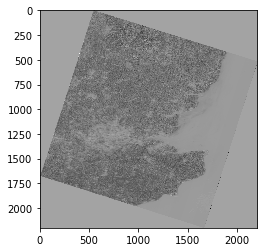

In [39]:
plt.imshow(ndbi_statistics[2]) 



---



**PREPARING TRAINING DATA**

In [14]:
tif2=gdal.Open('Y.tif')
Y_raster = tif2.GetRasterBand(1).ReadAsArray()
Y_raster[Y_raster <= 150] = 0
Y_raster[Y_raster > 150] = 255
print("UNIQUE CLASSES: ", np.unique(Y_raster))
Y_list=Y_raster.flatten().tolist()
y=np.reshape(Y_list,(IMG*IMG,1))
print(y.shape)

UNIQUE CLASSES:  [  0 255]
(4840000, 1)


In [17]:
records=[]
for i in tqdm(range(0,5)):
          records.append(ndbi_statistics[i].flatten().tolist())
          records.append(mndwi_statistics[i].flatten().tolist())
          records.append(ndvi_statistics[i].flatten().tolist())
          records.append(ndmir_statistics[i].flatten().tolist())
          records.append(ndrb_statistics[i].flatten().tolist())
          records.append(ndgb_statistics[i].flatten().tolist())


In [0]:
record=np.column_stack(records)
X=np.append(record, y, axis=1)
print('FULL TRAINING DATA SHAPE: ')
print(X.shape)


In [0]:
#np.savetxt('X.csv',record[np.random.choice(np.shape(X)[0], 1000, replace=False), :],delimiter=",")

In [0]:
X_small=X[np.random.choice(np.shape(X)[0], 10000, replace=False), :]
X_train=X_small[:,0:30]
Y_train=X_small[:,30]



---



**CLASSIFICATION SUPPORT VECTOR MACHINE - RBF KERNEL**

TRAINING

In [28]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf',C=500,gamma=100)
svclassifier.fit(X_train, Y_train)

SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

PREDICTIONS

In [0]:
Y_pred = svclassifier.predict(X[:,0:30])

METRICS

In [40]:
from sklearn.metrics import classification_report
print(classification_report(X[:,30], Y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.37      0.49    880598
       255.0       0.87      0.97      0.92   3959402

    accuracy                           0.86   4840000
   macro avg       0.80      0.67      0.70   4840000
weighted avg       0.85      0.86      0.84   4840000





---



**VISUALIZATION OF RESULTS - HUMAN SETTLEMENT - WEST EUROPE AREA**

ORIGINAL RGB IMAGE

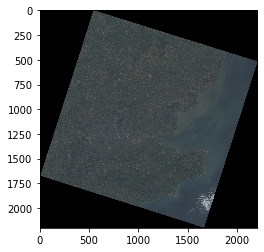

In [56]:
s4=gdal.Open('s2b4.tif')
red = s4.GetRasterBand(1).ReadAsArray()
r=red.astype(dtype='int')

s3 = gdal.Open('s2b3.tif')
green = s3.GetRasterBand(1).ReadAsArray()
g=green.astype(dtype='int')

s2 = gdal.Open('s2b2.tif')
blue = s2.GetRasterBand(1).ReadAsArray()
b=blue.astype(dtype='int')

def normalize(array):
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))
redn = normalize(r)
greenn = normalize(g)
bluen = normalize(b)

rgb = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
plt.imshow(rgb)

CLASSIFICATION RESULTS : BLACK=BUILT UP, WHITE=OTHERS

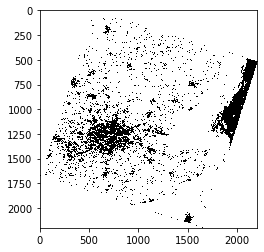

In [32]:
plt.gray()
plt.imshow(np.reshape(Y_pred,(2200,2200)))